In [1]:
# @title
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/ME 592/HW2/Agricultural_Image_Analytics-1.zip'

# Directory to extract the files
extract_dir = '/content/drive/MyDrive/ME 592/HW2/Extracted_Files'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extracted directory
extracted_files = os.listdir(extract_dir)
print(extracted_files)


['__MACOSX', 'AgandBio']


In [7]:
# Directory inside the extracted folder
agandbio_dir = '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio'

# List the files in the AgandBio directory
agandbio_files = os.listdir(agandbio_dir)
print(agandbio_files)


['.DS_Store', 'leaves', '2.JPG', '3.JPG', '1.JPG']


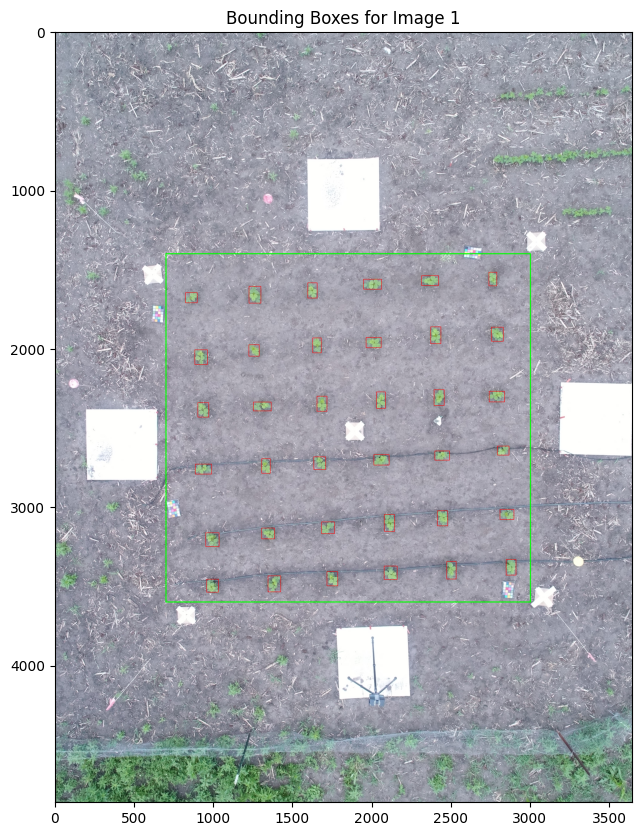

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/1.JPG',
    #'/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/2.JPG',
    #'/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/3.JPG'
]

# Function to calculate the distance between two points
def calculate_distance(pt1, pt2):
    return np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

# Function to extract and plot bounding boxes from an image
def plot_bounding_boxes(image_path, image_number):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Get image dimensions
    height, width, _ = image.shape

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)  # Close small gaps between soybeans
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest ones (assuming the soybeans are the largest objects)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # List to store bounding boxes and their centers
    bounding_boxes = []

    # Loop through the contours to get bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    # Define the central region of the image using the specific coordinates
    center_x_start = 700
    center_y_start = 1400
    center_x_end = 3000
    center_y_end = 3600

    # Filter bounding boxes to be within the central region
    final_boxes = []

    for box in bounding_boxes:
        x, y, w, h = box
        # Check if the bounding box is within the defined central region
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            final_boxes.append(box)

        # Stop once we have 36 detections
        if len(final_boxes) >= 36:
            break

    # Draw the central region as a box (in green)
    cv2.rectangle(image, (center_x_start, center_y_start), (center_x_end, center_y_end), (0, 255, 0), 5)

    # Draw red bounding boxes around the detected soybeans
    for box in final_boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red color with thickness 2

    # Convert the image back to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes and central region box
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    #plt.axis('off')  # Hide axes for better visualization
    plt.title(f'Bounding Boxes for Image {image_number}')
    plt.show()

# Process each image
for idx, image_path in enumerate(image_paths):
    plot_bounding_boxes(image_path, idx + 1)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/1.JPG',
    #'/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/2.JPG',
    #'/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/3.JPG'
]

# Function to extract and plot subplots from an image
def plot_subplots(image_path, image_number):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)  # Close small gaps between soybeans
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Define the central region of the image (coordinates for the grid)
    center_x_start = 700
    center_y_start = 1400
    center_x_end = 3000
    center_y_end = 3600

    # Filter contours that fall within the central region
    contours_in_region = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Only include contours that are within the central grid area
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            contours_in_region.append(contour)

    # Sort contours within the central region by area and keep the largest ones (up to 36)
    contours_in_region = sorted(contours_in_region, key=cv2.contourArea, reverse=True)[:36]

    # Create a figure to plot the subplots (6x6 grid for 36 subplots)
    fig, axes = plt.subplots(6, 6, figsize=(15, 15))
    fig.suptitle(f'Subplots from Image {image_number}', fontsize=16)

    # Loop over the contours and plot the subplots
    for i, contour in enumerate(contours_in_region):
        # Get the bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the subplot (soybean) from the image
        subplot = image_rgb[y:y+h, x:x+w]

        # Plot the subplot in the grid
        ax = axes[i // 6, i % 6]  # Determine the position in the 6x6 grid
        ax.imshow(subplot)
        ax.axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

# Process each image
for idx, image_path in enumerate(image_paths):
    plot_subplots(image_path, idx + 1)


Output hidden; open in https://colab.research.google.com to view.

# Image 2

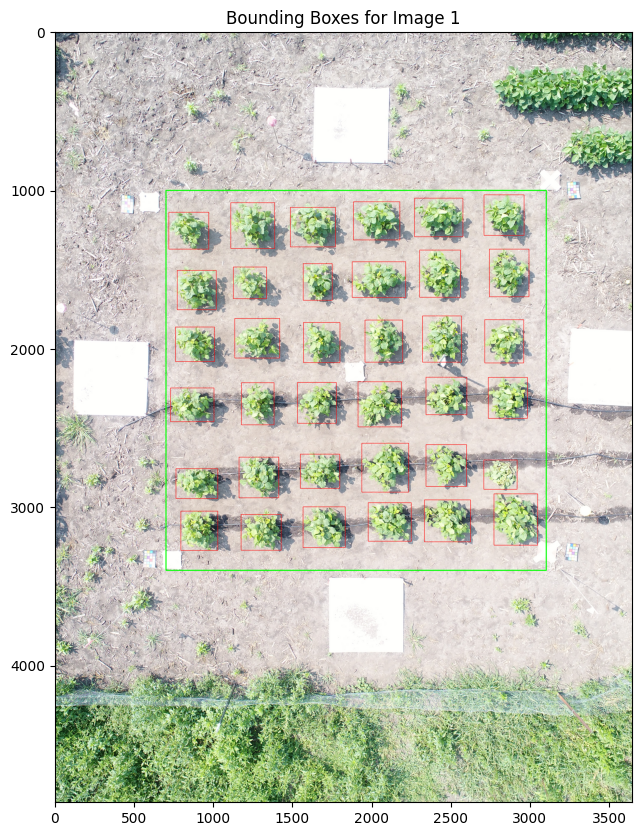

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/2.JPG',
]

# Function to calculate the distance between two points
def calculate_distance(pt1, pt2):
    return np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

# Function to extract and plot bounding boxes from an image
def plot_bounding_boxes(image_path, image_number):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Get image dimensions
    height, width, _ = image.shape

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)  # Close small gaps between soybeans
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest ones (assuming the soybeans are the largest objects)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # List to store bounding boxes and their centers
    bounding_boxes = []

    # Loop through the contours to get bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    # Define the central region of the image using the specific coordinates
    center_x_start = 700
    center_y_start = 1000
    center_x_end = 3100
    center_y_end = 3400

    # Filter bounding boxes to be within the central region
    final_boxes = []

    for box in bounding_boxes:
        x, y, w, h = box
        # Check if the bounding box is within the defined central region
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            final_boxes.append(box)

        # Stop once we have 36 detections
        if len(final_boxes) >= 36:
            break

    # Draw the central region as a box (in green)
    cv2.rectangle(image, (center_x_start, center_y_start), (center_x_end, center_y_end), (0, 255, 0), 5)

    # Draw red bounding boxes around the detected soybeans
    for box in final_boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red color with thickness 2

    # Convert the image back to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes and central region box
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    #plt.axis('off')  # Hide axes for better visualization
    plt.title(f'Bounding Boxes for Image {image_number}')
    plt.show()

# Process each image
for idx, image_path in enumerate(image_paths):
    plot_bounding_boxes(image_path, idx + 1)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/2.JPG',
]

# Function to extract and plot subplots from an image
def plot_subplots(image_path, image_number):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((5, 5), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)  # Close small gaps between soybeans
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Define the central region of the image using the specific coordinates
    center_x_start = 700
    center_y_start = 1000
    center_x_end = 3100
    center_y_end = 3400

    # Filter contours that fall within the central region
    contours_in_region = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Only include contours that are within the central grid area
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            contours_in_region.append(contour)

    # Sort contours within the central region by area and keep the largest ones (up to 36)
    contours_in_region = sorted(contours_in_region, key=cv2.contourArea, reverse=True)[:36]

    # Create a figure to plot the subplots (6x6 grid for 36 subplots)
    fig, axes = plt.subplots(6, 6, figsize=(15, 15))
    fig.suptitle(f'Subplots from Image {image_number}', fontsize=16)

    # Loop over the contours and plot the subplots
    for i, contour in enumerate(contours_in_region):
        # Get the bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the subplot (soybean) from the image
        subplot = image_rgb[y:y+h, x:x+w]

        # Plot the subplot in the grid
        ax = axes[i // 6, i % 6]  # Determine the position in the 6x6 grid
        ax.imshow(subplot)
        ax.axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

# Process each image
for idx, image_path in enumerate(image_paths):
    plot_subplots(image_path, idx + 1)


Output hidden; open in https://colab.research.google.com to view.

# Image 3

# Kevin's implementation

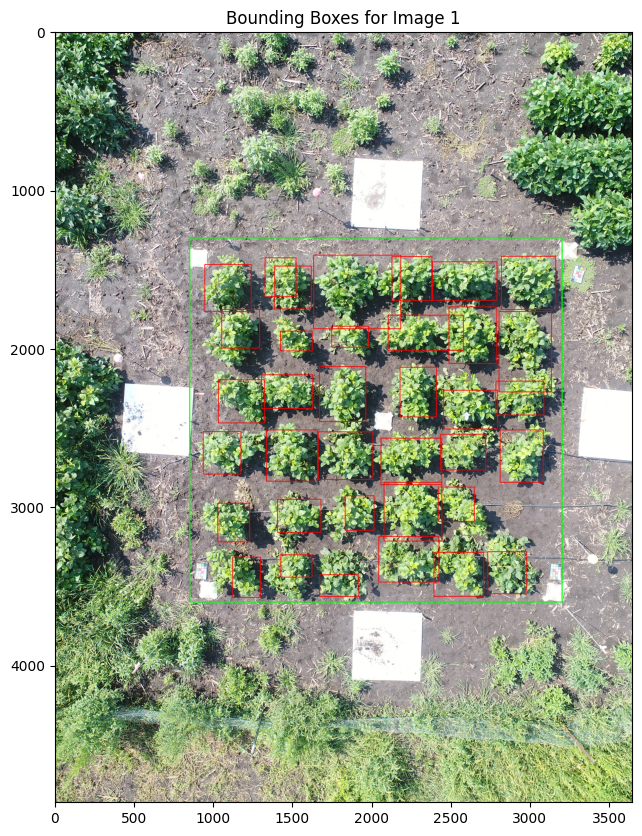

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    #'/content/drive/MyDrive/Hwk2/AgandBio/3.JPG'
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/3.JPG'
]

# Function to calculate the distance between two points
def calculate_distance(pt1, pt2):
    return np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

# Function to extract and plot bounding boxes from an image
def plot_bounding_boxes(image_path, image_number):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Get image dimensions
    height, width, _ = image.shape

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([41, 52, 75])
    upper_green = np.array([90, 245, 255])

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #plt.figure(figsize=(10, 10))
    #plt.imshow(hsv)

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)


    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((6, 6), np.uint8)
    kernel1 = np.ones((7, 7), np.uint8)

    #green_mask = cv2.erode(green_mask,kernel2,iterations = 1)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations = 1)  # Remove small noise
    #green_mask = cv2.dilate(green_mask,kernel2,iterations = 1)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel1, iterations = 1)  # Close small gaps between soybeans
    #green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_GRADIENT, kernel2)

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest ones (assuming the soybeans are the largest objects)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) <= 110000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # List to store bounding boxes and their centers
    bounding_boxes = []


    # Loop through the contours to get bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    # Define the central region of the image using the specific coordinates
    center_x_start = 850
    center_y_start = 1300
    center_x_end = 3200
    center_y_end = 3600

    # Filter bounding boxes to be within the central region
    final_boxes = []

    for box in bounding_boxes:
        x, y, w, h = box
        # Check if the bounding box is within the defined central region
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            final_boxes.append(box)

        # Stop once we have 36 detections
        if len(final_boxes) >= 36:
            break

    # Draw the central region as a box (in green)
    cv2.rectangle(image, (center_x_start, center_y_start), (center_x_end, center_y_end), (0, 255, 0), 5)

    # Draw red bounding boxes around the detected soybeans
    for box in final_boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 4)  # Red color with thickness 4

    # Convert the image back to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes and central region box
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    #plt.axis('off')  # Hide axes for better visualization
    plt.title(f'Bounding Boxes for Image {image_number}')
    plt.show()


# Process each image
for idx, image_path in enumerate(image_paths):
    plot_bounding_boxes(image_path, idx + 1)


Final

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/3.JPG'
]

# Function to calculate the distance between two points
def calculate_distance(pt1, pt2):
    return np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

# Function to check if two bounding boxes overlap more than 50% of the area
def is_overlapping(box1, box2, threshold=0.5):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate the intersection area
    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    overlap_area = x_overlap * y_overlap

    # Calculate the area of both bounding boxes
    area1 = w1 * h1
    area2 = w2 * h2

    # Calculate the overlap ratio (intersection over union)
    iou = overlap_area / float(area1)

    return iou > threshold  # Returns True if overlap is more than 50%

# Function to extract and plot bounding boxes from an image
def plot_bounding_boxes(image_path, image_number, ax):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Get image dimensions
    height, width, _ = image.shape

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([41, 52, 75])
    upper_green = np.array([90, 245, 255])

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((6, 6), np.uint8)
    kernel1 = np.ones((7, 7), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel1, iterations=1)  # Close small gaps between soybeans

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest ones (assuming the soybeans are the largest objects)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) <= 110000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # List to store bounding boxes
    bounding_boxes = []

    # Loop through the contours to get bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    # Define the central region of the image using the specific coordinates
    center_x_start = 850
    center_y_start = 1300
    center_x_end = 3200
    center_y_end = 3600

    # Filter bounding boxes to be within the central region
    final_boxes = []

    for box in bounding_boxes:
        x, y, w, h = box
        # Check if the bounding box is within the defined central region
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            final_boxes.append(box)

        # Stop once we have 36 detections
        if len(final_boxes) >= 36:
            break

    # Define the regions for the rows (adjust height as needed)
    first_row_y_start = 1300
    first_row_y_end = 1700
    third_row_y_start = 2050
    third_row_y_end = 2600

    # Filter bounding boxes to avoid overlaps in the first and third rows
    filtered_first_row_boxes = []
    filtered_third_row_boxes = []
    final_filtered_boxes = []

    for box in final_boxes:
        x, y, w, h = box

        # Check if the box is in the first row
        if first_row_y_start <= y <= first_row_y_end:
            # Remove overlapping boxes in the first row
            if not any(is_overlapping(box, other_box) for other_box in filtered_first_row_boxes):
                filtered_first_row_boxes.append(box)

        # Check if the box is in the third row
        elif third_row_y_start <= y <= third_row_y_end:
            # Remove overlapping boxes in the third row
            if not any(is_overlapping(box, other_box) for other_box in filtered_third_row_boxes):
                filtered_third_row_boxes.append(box)

        # Keep boxes outside of the defined rows
        else:
            final_filtered_boxes.append(box)

    # Merge the boxes from the first and third rows with the rest
    final_filtered_boxes = filtered_first_row_boxes + final_filtered_boxes + filtered_third_row_boxes

    # Draw the central region as a box (in green)
    cv2.rectangle(image, (center_x_start, center_y_start), (center_x_end, center_y_end), (0, 255, 0), 5)

    # Draw red bounding boxes around the detected soybeans
    for box in final_filtered_boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 4)  # Red color with thickness 4

    # Convert the image back to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image on the given axis
    ax.imshow(image_rgb)
    ax.set_title(f'Bounding Boxes for Image {image_number}')
    ax.axis('off')  # Hide the axes

# Create a figure for the subplots
fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 10))

# If there is only one image, axes will not be a list, so we need to handle that case
if len(image_paths) == 1:
    axes = [axes]

# Process each image
for idx, (image_path, ax) in enumerate(zip(image_paths, axes)):
    plot_bounding_boxes(image_path, idx + 1, ax)

# Show the plot with subplots
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image paths
image_paths = [
    '/content/drive/MyDrive/ME 592/HW2/Extracted_Files/AgandBio/3.JPG'
]

# Function to calculate the distance between two points
def calculate_distance(pt1, pt2):
    return np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

# Function to check if two bounding boxes overlap more than 50% of the area
def is_overlapping(box1, box2, threshold=0.5):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate the intersection area
    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    overlap_area = x_overlap * y_overlap

    # Calculate the area of both bounding boxes
    area1 = w1 * h1
    area2 = w2 * h2

    # Calculate the overlap ratio (intersection over union)
    iou = overlap_area / float(area1)

    return iou > threshold  # Returns True if overlap is more than 50%

# Function to extract and plot bounding boxes from an image
def plot_bounding_boxes(image_path, image_number, ax):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Define the green color range for soybeans in HSV (lower and upper bounds)
    lower_green = np.array([41, 52, 75])
    upper_green = np.array([90, 245, 255])

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask to extract only green regions
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to remove noise and separate connected soybeans
    kernel = np.ones((6, 6), np.uint8)
    kernel1 = np.ones((7, 7), np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel1, iterations=1)  # Close small gaps between soybeans

    # Find contours based on the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest ones (assuming the soybeans are the largest objects)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) <= 110000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # List to store bounding boxes
    bounding_boxes = []

    # Loop through the contours to get bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    # Define the central region of the image using the specific coordinates
    center_x_start = 850
    center_y_start = 1300
    center_x_end = 3200
    center_y_end = 3600

    # Filter bounding boxes to be within the central region
    final_boxes = []

    for box in bounding_boxes:
        x, y, w, h = box
        # Check if the bounding box is within the defined central region
        if (x >= center_x_start and x + w <= center_x_end and
            y >= center_y_start and y + h <= center_y_end):
            final_boxes.append(box)

        # Stop once we have 36 detections
        if len(final_boxes) >= 36:
            break

    # Create a 5x7 grid of subplots (35 subplots max)
    rows, cols = 5, 7
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the axes for easier indexing

    # Remove extra subplots if fewer than 35 soybeans are found
    for i in range(len(final_boxes), len(axes)):
        axes[i].axis('off')

    # Loop over the bounding boxes and plot each subplot
    for idx, (box, ax) in enumerate(zip(final_boxes, axes)):
        x, y, w, h = box
        subplot = image_rgb[y:y+h, x:x+w]  # Extract the region of interest

        ax.imshow(subplot)
        ax.axis('off')  # Hide axes for better visualization
        ax.set_title(f'Soybean {idx + 1}')

    plt.tight_layout()
    plt.show()

# Process each image and plot the bounding boxes and subplots
for idx, image_path in enumerate(image_paths):
    plot_bounding_boxes(image_path, idx + 1, None)


Output hidden; open in https://colab.research.google.com to view.